In [72]:
#import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#load data set
data=pd.read_csv("D:/JupyterNotebooks/Queries.csv")
queries_df=pd.DataFrame(data)

In [37]:
df

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02
2,python projects with source code,2077,73380,2.83%,5.94
3,classification report in machine learning,2012,4959,40.57%,1.28
4,the clever programmer,1931,2528,76.38%,1.09
...,...,...,...,...,...
995,human activity recognition python code,48,369,13.01%,6.53
996,python contact book project,48,334,14.37%,4.92
997,why standard scaler is used,48,295,16.27%,2.07
998,credit scoring machine learning python,48,243,19.75%,6.40


In [38]:
queries_df.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02
2,python projects with source code,2077,73380,2.83%,5.94
3,classification report in machine learning,2012,4959,40.57%,1.28
4,the clever programmer,1931,2528,76.38%,1.09


In [39]:
queries_df.isnull().sum()

Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64

In [40]:
queries_df.value_counts()

Top queries                                                        Clicks  Impressions  CTR     Position
write a python program that calculates number of seconds in a day  63      95           66.32%  1.00        1
100 python projects                                                212     7423         2.86%   6.99        1
190 python projects with source code                               52      645          8.06%   3.31        1
60 python projects with source code                                50      1212         4.13%   4.55        1
82 python projects with source code                                1343    3562         37.7%   1.32        1
                                                                                                           ..
accuracy of a model in python                                      92      198          46.46%  1.36        1
accuracy model python                                              80      167          47.9%   1.43        1
accuracy machin

# Exploratory Data Analysis
# Let’s have a look at the column insights before moving forward:

In [41]:
queries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [48]:
#queries_df['CTR'] = queries_df['CTR'].str.rstrip("%").astype('float')/100
#or this method can also used
queries_df['CTR'] = queries_df['CTR'].astype('float')

In [49]:
queries_df['CTR'].dtype

dtype('float64')

In [50]:
queries_df['CTR']

0      0.3583
1      0.8128
2      0.0283
3      0.4057
4      0.7638
        ...  
995    0.1301
996    0.1437
997    0.1627
998    0.1975
999    0.2892
Name: CTR, Length: 1000, dtype: float64

# Now, let’s analyze common words in each search query:

In [56]:
from collections import Counter
import re
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [63]:
word_counter={}

for query in queries_df['Top queries']:
    words=query.split(" ")
    for word in words:
        if word in word_counter:
            word_counter[word]+=1
        else:
            word_counter[word]=1

#print(word_counter)
words_df = pd.DataFrame(word_counter.items(), columns=['Word','Frequency'])
words_df

,Word,Frequency
0,number,94
1,guessing,43
2,game,103
3,python,562
4,thecleverprogrammer,1
...,...,...
633,micro,1
634,roc,1
635,auc,1
636,scoring,1


In [69]:
##sort word_df for first max 20 values
words_df.sort_values(by='Frequency',ascending=False,inplace=True)
words_df

,Word,Frequency
3,python,562
11,in,232
8,code,138
13,learning,133
12,machine,123
...,...,...
627,60,1
599,tkinter,1
600,dissertation,1
601,economics,1


In [70]:
#cut it to first 20 values
words_df=words_df[:20]
words_df

,Word,Frequency
3,python,562
11,in,232
8,code,138
13,learning,133
12,machine,123
28,using,105
2,game,103
0,number,94
64,to,82
27,prediction,70


<bound method Figure.show of <Figure size 2500x500 with 1 Axes>>

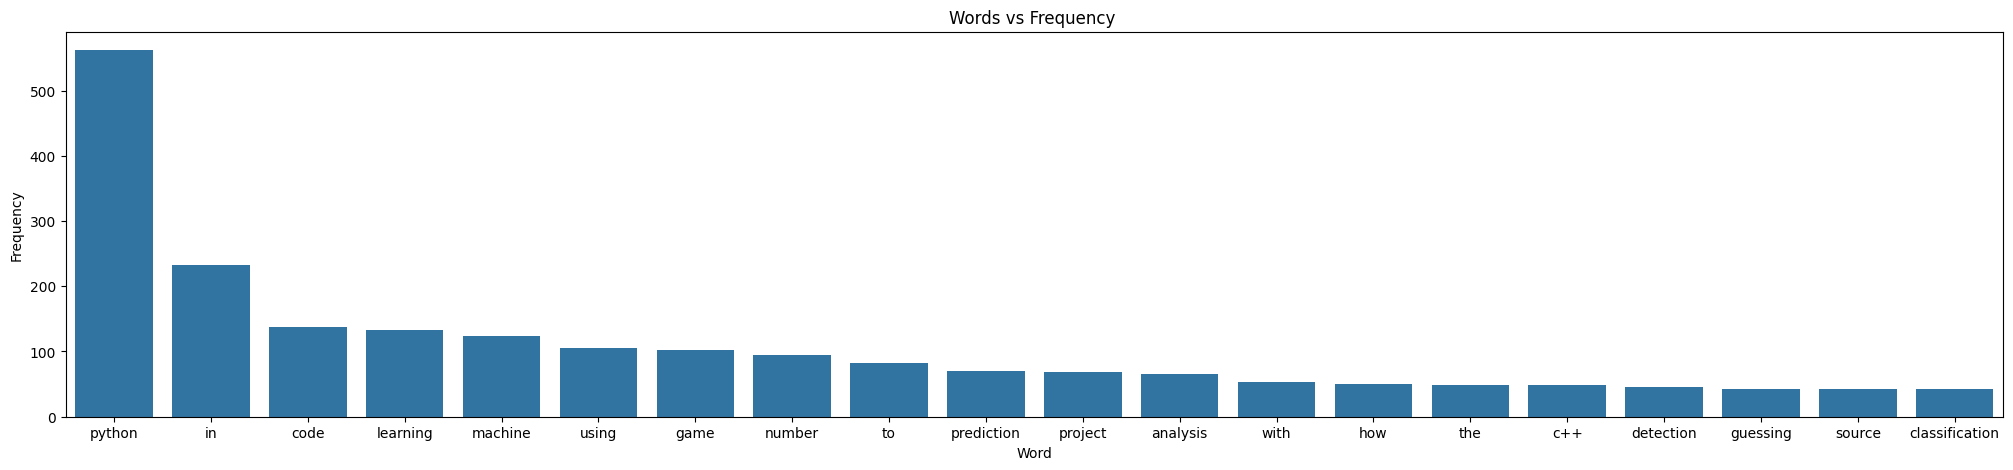

In [75]:
# Plotting the word frequencies
figure = plt.figure(figsize = (25,5))
plt.title("Words vs Frequency ")
sns.barplot(x='Word',y ='Frequency',data=words_df)
figure.show

In [78]:
#Now, let’s have a look at the top queries by clicks and impressions:
top_queries_df = queries_df.sort_values(by=['Clicks','Impressions'],ascending=False)
top_queries_df

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09
...,...,...,...,...,...
995,human activity recognition python code,48,369,0.1301,6.53
996,python contact book project,48,334,0.1437,4.92
997,why standard scaler is used,48,295,0.1627,2.07
998,credit scoring machine learning python,48,243,0.1975,6.40


<bound method Figure.show of <Figure size 3500x500 with 1 Axes>>

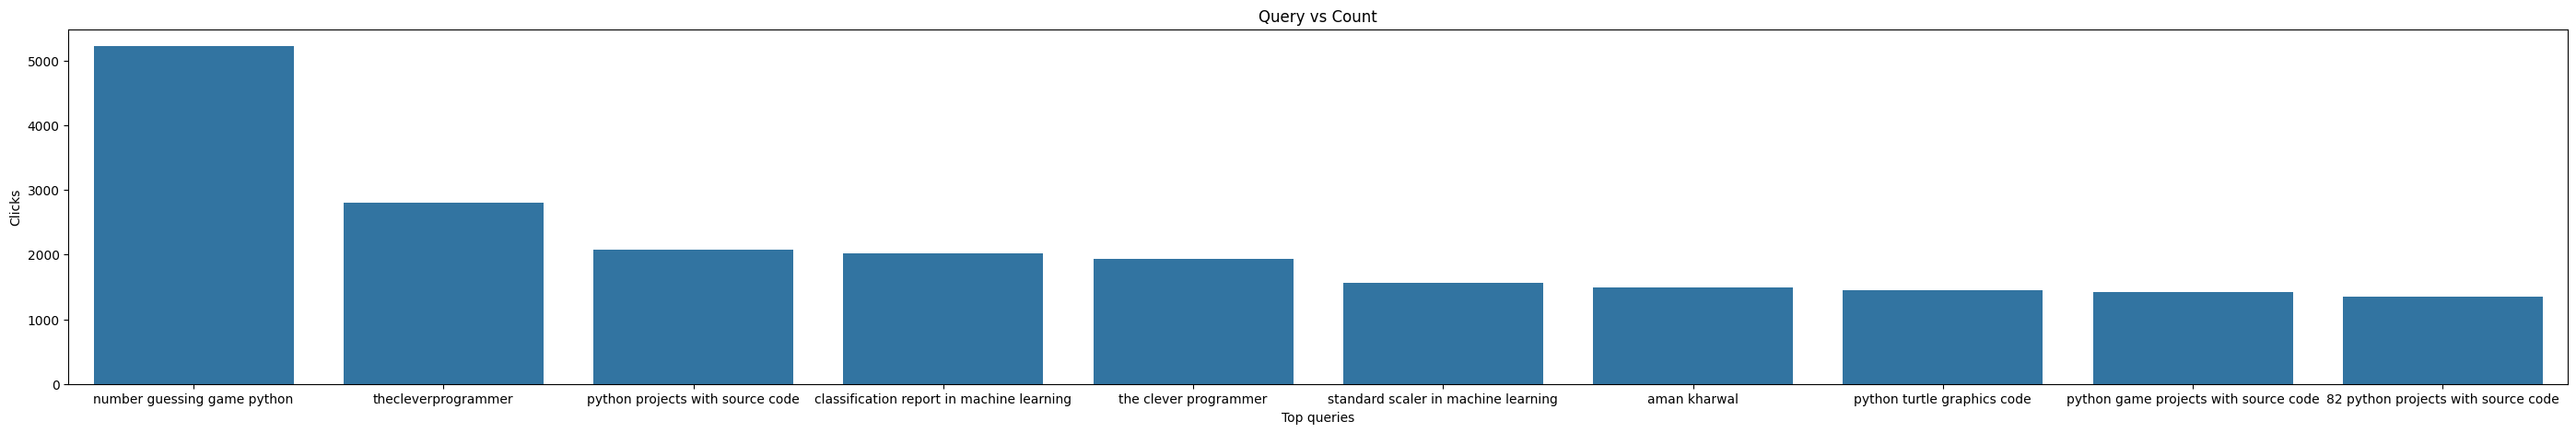

In [82]:
##plot a count plot
figure = plt.figure(figsize=(35,5))
plt.title("Query vs Count")
sns.barplot(x='Top queries',y='Clicks',data=top_queries_df[:10])
figure.show

<bound method Figure.show of <Figure size 3500x500 with 1 Axes>>

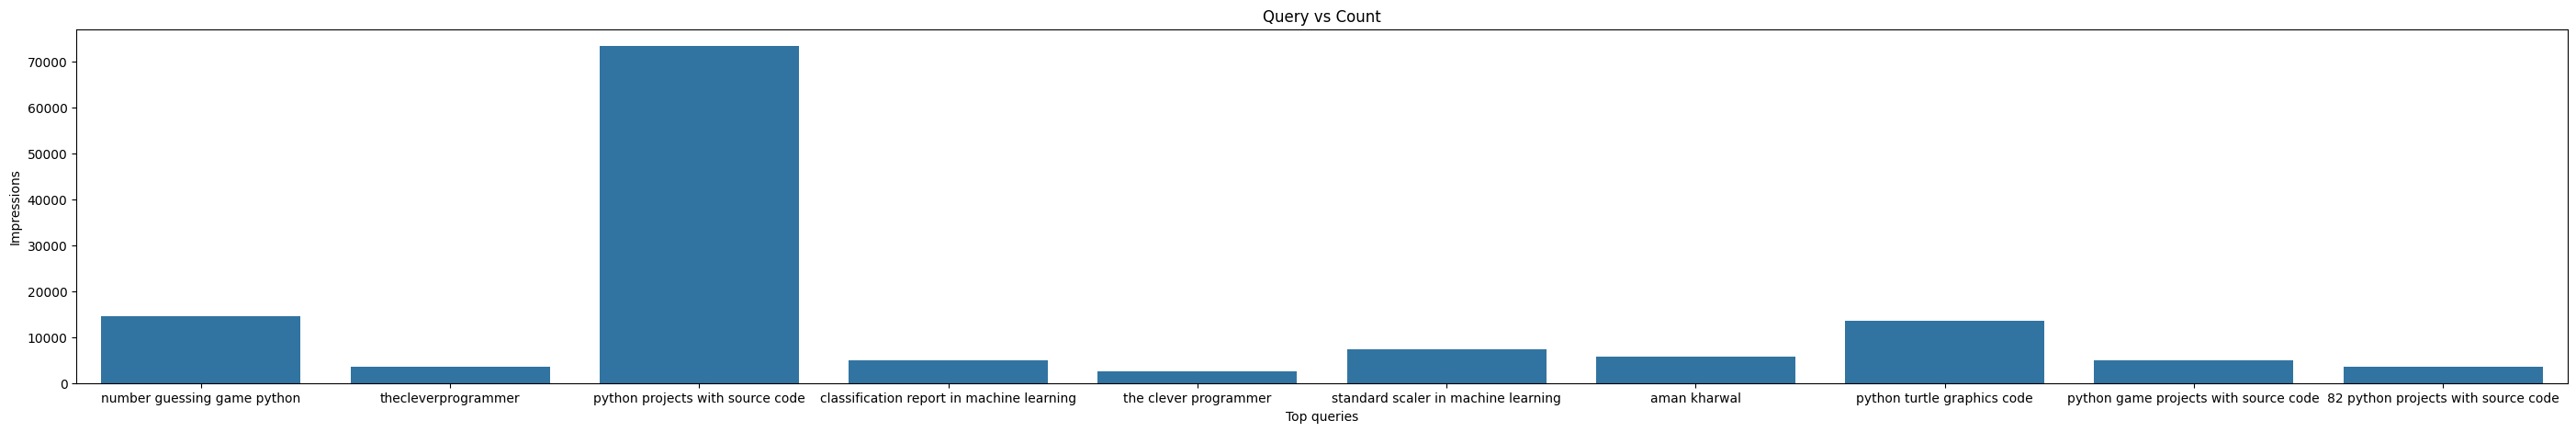

In [83]:
##plot a count plot
figure = plt.figure(figsize=(35,5))
plt.title("Query vs Count")
sns.barplot(x='Top queries',y='Impressions',data=top_queries_df[:10])
figure.show

<bound method Figure.show of <Figure size 3500x500 with 1 Axes>>

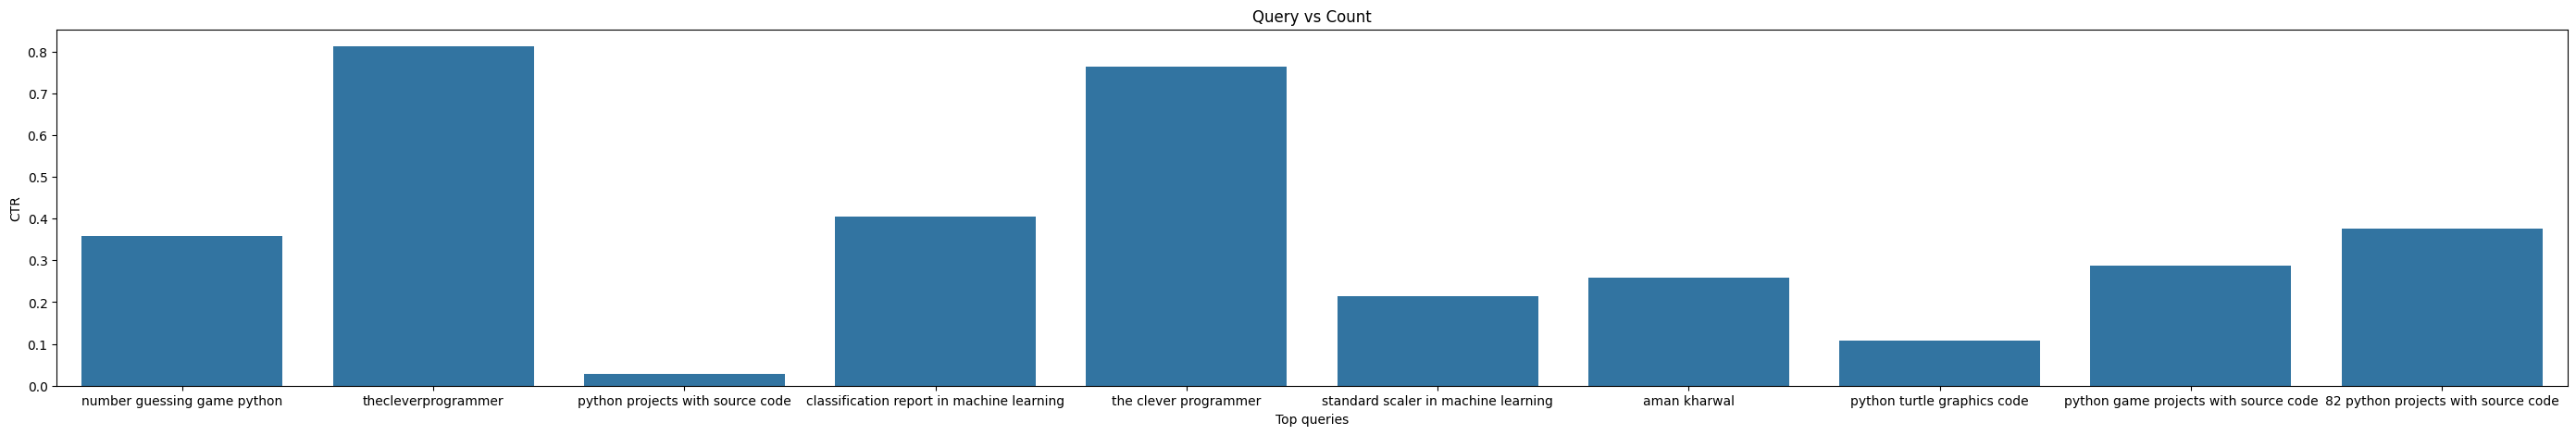

In [84]:
#Now, let’s analyze the queries with the highest and lowest CTRs:
figure = plt.figure(figsize=(35,5))
plt.title("Query vs Count")
sns.barplot(x='Top queries',y='CTR',data=top_queries_df[:10])
figure.show

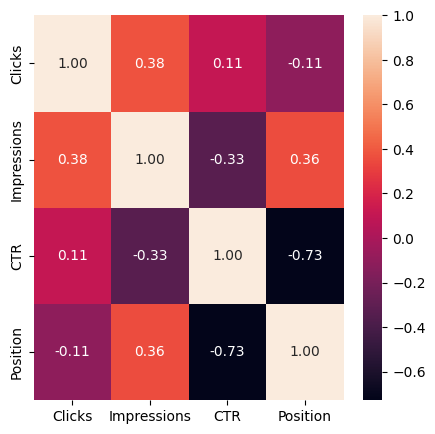

In [90]:
#Now, let’s have a look at the correlation between different metrics:
#correlation_matrix=queries_df[['Clicks', 'Impressions', 'CTR', 'Position']].corr() if you want to plot for specific columns
plt.figure(figsize=(5,5))
sns.heatmap(queries_df[['Clicks', 'Impressions', 'CTR', 'Position']].corr(), annot=True, fmt=".2f")
plt.show()

In [91]:
from sklearn.ensemble import IsolationForest

In [95]:
# Selecting relevant features
features = queries_df[['Clicks', 'Impressions', 'CTR', 'Position']]

# Initializing Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01)  # contamination is the expected proportion of outliers

# Fitting the model
iso_forest.fit(features)

# Predicting anomalies
queries_df['anomaly'] = iso_forest.predict(features)


In [102]:
queries_df.head(10)

,Top queries,Clicks,Impressions,CTR,Position,anomaly
0,number guessing game python,5223,14578,0.3583,1.61,-1
1,thecleverprogrammer,2809,3456,0.8128,1.02,-1
2,python projects with source code,2077,73380,0.0283,5.94,-1
3,classification report in machine learning,2012,4959,0.4057,1.28,-1
4,the clever programmer,1931,2528,0.7638,1.09,-1
5,standard scaler in machine learning,1559,7292,0.2138,1.53,1
6,aman kharwal,1490,5752,0.2590,3.75,1
7,python turtle graphics code,1455,13585,0.1071,4.60,1
8,python game projects with source code,1421,4946,0.2873,2.23,1
9,82 python projects with source code,1343,3562,0.3770,1.32,1


In [101]:
queries_df['anomaly'].value_counts()

anomaly
 1    990
-1     10
Name: count, dtype: int64

In [104]:
# Filtering out the anomalies
anomalies = queries_df[queries_df['anomaly'] == -1]
#Here’s how to analyze the detected anomalies to understand their nature and whether they represent true outliers or data errors:
print(anomalies[['Top queries', 'Clicks', 'Impressions', 'CTR', 'Position']])

                                   Top queries  Clicks  Impressions     CTR  \
0                  number guessing game python    5223        14578  0.3583   
1                          thecleverprogrammer    2809         3456  0.8128   
2             python projects with source code    2077        73380  0.0283   
3    classification report in machine learning    2012         4959  0.4057   
4                        the clever programmer    1931         2528  0.7638   
15                  rock paper scissors python    1111        35824  0.0310   
21                       classification report     933        39896  0.0234   
34                    machine learning roadmap     708        42715  0.0166   
82                                    r2 score     367        56322  0.0065   
167                        text to handwriting     222        11283  0.0197   

     Position  
0        1.61  
1        1.02  
2        5.94  
3        1.28  
4        1.09  
15       7.19  
21       7.53  
34